The dataset country.csv contains Corruption Perception Index and Gini Index of 20 countries . Corruption Perception Index close to 100 indicates low corruption and close to 0 indicates high corruption. Ginni Index is a measure of income distribution among citizens of a country(high Gini indicates high inequality).
Use Python code:

1. Develop a simple linear regression model between corruption perception index (Y) and Gini index (X). What is the change in the corruption perception index for every one unit increase in GIni index?
2. What proportion of the variation in corruption perception index is explained by Gini Index?
3. Is there a statistically significant relationship between corruption perception index and Gini index at alpha value of 0.1?
4. Calculate the 95% confidence interval for the regression coefficient $$b_1$$.


This problem is taken from the book:  
**"Machine Learning with Python"** by **Manaranjan Pradhan** and **U Dinesh Kumar**

This notebook is created for **educational purposes** only.

**Link to the csv file** :- 

https://github.com/reddyprasade/DataSet-for-ML-and-Data-Science/blob/master/DataSets/country.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
np.set_printoptions(precision=4, linewidth=100)

**Getting Dataset into DataFrame**

In [6]:
country = pd.read_csv('country.csv')
country

,Country,Corruption_Index,Gini_Index
0,Hong Kong,77,53.7
1,South Korea,53,30.2
2,China,40,46.2
3,Italy,47,32.7
4,Mongolia,38,36.5
5,Austria,75,27.6
6,Norway,85,23.5
7,UK,81,31.6
8,Canada,82,33.7
9,Germany,81,30.7


In [7]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           20 non-null     object 
 1   Corruption_Index  20 non-null     int64  
 2   Gini_Index        20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 612.0+ bytes


**Creating Feature Set(X) and Outcome Variable(Y)** :-
   The `Gini_Index` will be X and `Corruption_Index` will be Y. To estimate regression coefficient $\beta_0$, a constant term of 1 needs to be added as a separate column.

In [50]:
X = sm.add_constant(country['Gini_Index'])
Y = country['Corruption_Index']
X.head()

,const,Gini_Index
0,1.0,53.7
1,1.0,30.2
2,1.0,46.2
3,1.0,32.7
4,1.0,36.5


In [51]:
Y.head()

0    77
1    53
2    40
3    47
4    38
Name: Corruption_Index, dtype: int64

**Splitting the Dataset into Training and Validation Sets**

We will use 80% of the dataset as Training Set and 20% as Validation Set

In [13]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=100)

**Fitting the Model** :- We will fit the model using OLS method

**Printing Estimated Parameters and Interpreting Them**

In [52]:
country_lm = sm.OLS(train_Y, train_X).fit()
country_lm.params


const         95.222379
Gini_Index    -0.897565
dtype: float64

The estimated(predicted) model can be written as 
        
        Corruption_index = 95.222379 + (-0.897567) * (Gini_Index)

**MODEL DIAGONISTICS**

In [53]:
country_lm.summary2()

C:\Users\rahak\.virtualenvs\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.070   
Dependent Variable: Corruption_Index AIC:                140.5223
Date:               2025-06-03 22:34 BIC:                142.0674
No. Observations:   16               Log-Likelihood:     -68.261 
Df Model:           1                F-statistic:        2.126   
Df Residuals:       14               Prob (F-statistic): 0.167   
R-squared:          0.132            Scale:              339.78  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025   0.975] 
------------------------------------------------------------------
const        95.2224   21.6919   4.3898  0.0006  48.6980  141.7468
Gini_Index   -0.8976    0.6155  -1.4582  0.1668  -2.2177    0.4226
-----------------------------------------------------------------
Omnibus:               1.936        Durbin-Watson:          2.195
Prob(Omnibus):         0.380        Jarque-Bera (JB):       0.999
Skew:                  -0.169       Prob(JB):               0.607
Kurtosis:              1.823        Condition No.:          166  
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

From the summary output shown above, we can infer the folowing :-
1. The model R-squared value is 0.132, that is, the model explains 13.2% of the variation in Corruption Perception Index
2. The p-value for the t-test is 0.1668 which indicates that there is no statistaclly significant relationship (at significance value $\alpha$ = 0.1) between the feature, Gini Index, and Corruption Perception Index. Als the probability value of F-statistic of the model is 0.167 which indicates that the overall model is statistically insignificant.

**RESIDUAL ANALYSIS**

**1. Checking for Normal Distribution of Residual**

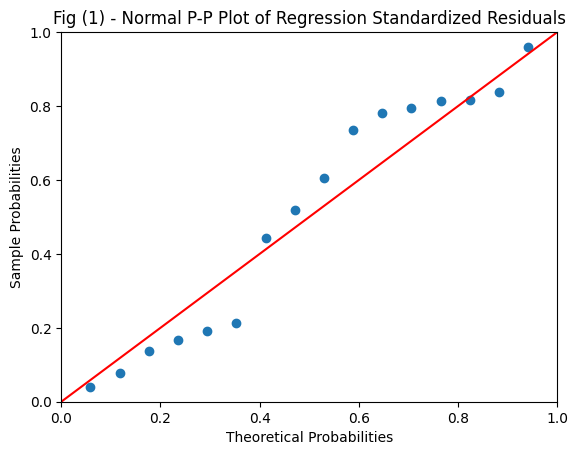

In [54]:
standardized_resid = StandardScaler().fit_transform(country_lm.resid.values.reshape(-1, 1)).flatten()

probplot = sm.ProbPlot(standardized_resid)
probplot.ppplot(line='45')
plt.title("Fig (1) - Normal P-P Plot of Regression Standardized Residuals")
plt.show()

Since the dots are close to the diagonal line, we can conclude the residuals follow an approximate normal distribution.

**2. Test of Homoscedasticity**

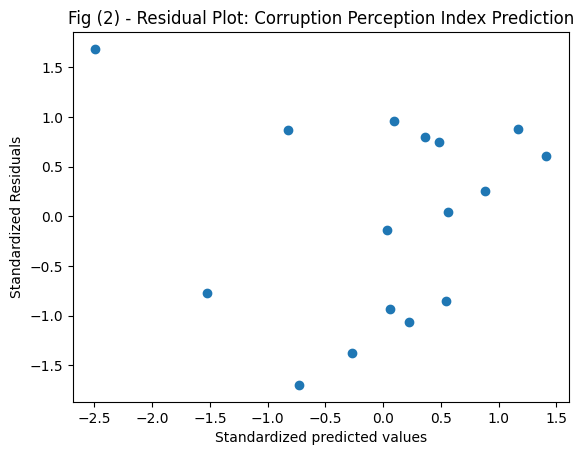

In [19]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()


plt.scatter(get_standardized_values(country_lm.fittedvalues), get_standardized_values(country_lm.resid))
plt.title("Fig (2) - Residual Plot: Corruption Perception Index Prediction")
plt.xlabel("Standardized predicted values")
plt.ylabel("Standardized Residuals")
plt.show()

From the scatter plot, it is observed that the residuals are random and have no funnel shape, which means the residuals have constant variance(homeoscedasticity).

**Outlier Analysis**

1. Z-Score

In [21]:
country['z_score_CI'] = stats.zscore(country.Corruption_Index)
country[(country.z_score_CI > 3.0) | (country.z_score_CI < -3.0)]

,Country,Corruption_Index,Gini_Index,z_score_CI


We see that there are no observations that are outliers as per the Z-score.

2. Cook's Distance

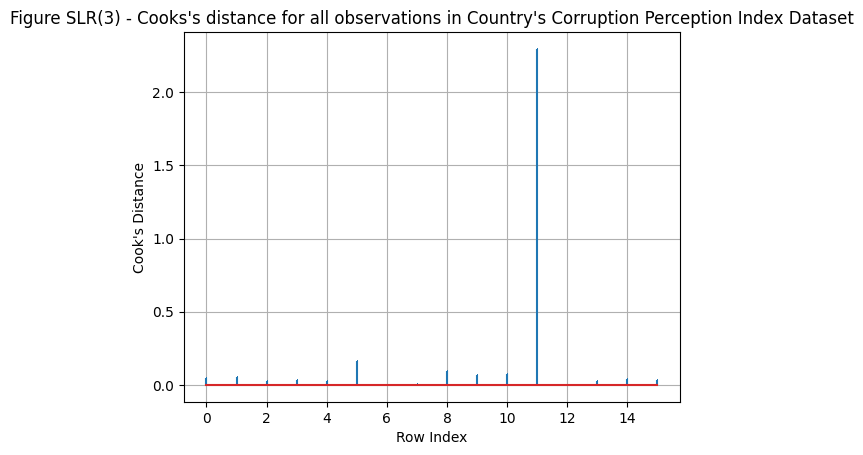

In [22]:
Corrupt_influence = country_lm.get_influence()
(c, p) = Corrupt_influence.cooks_distance

plt.stem(np.arange(len(train_X)), np.round(c, 3), markerfmt=",")
plt.title("Figure SLR(3) - Cooks's distance for all observations in Country's Corruption Perception Index Dataset")
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.grid()
plt.show()

Here we see for the value 11 the Cook's Distance exceeds 1. And hence it is an Outlier, so we find and remove that data and then make remake a new Model

In [24]:
country[country.index.isin([11])]

,Country,Corruption_Index,Gini_Index,z_score_CI
11,Denmark,90,27.5,1.408309


In [29]:
train_X

,const,Gini_Index
13,1.0,40.8
6,1.0,23.5
16,1.0,34.0
1,1.0,30.2
9,1.0,30.7
14,1.0,40.1
12,1.0,30.1
5,1.0,27.6
2,1.0,46.2
4,1.0,36.5


But we see that the index 11 is not present in the Training Set, meaning it is present in the Validation Set so we can ignore it for now as it will not influence in model training. The Cook's Distance is plot according to the entire DataFrame of country.

(Note : I have come to this realisation after trying to drop the data from the training sets, the steps of which or the code for which has been skipped)

3. Leverage Values

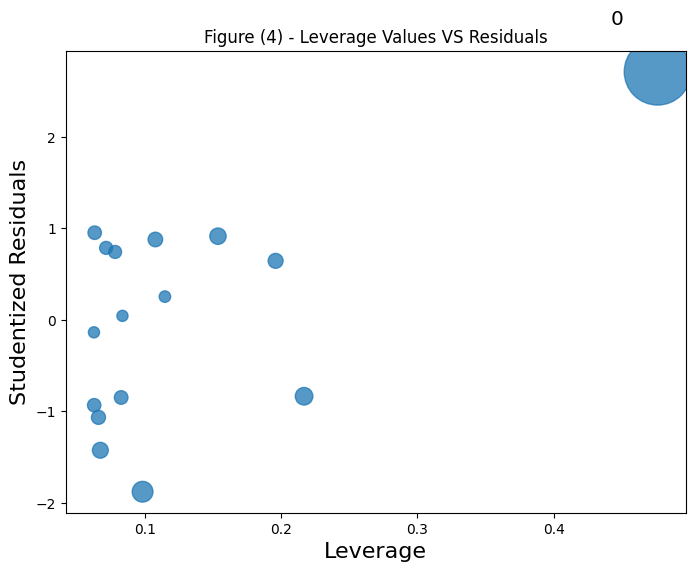

In [30]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(8, 6))
influence_plot(country_lm, ax=ax)
plt.title("Figure (4) - Leverage Values VS Residuals")
plt.show()

In the above figure, the size of the circle is proportional to the product of residual and leverage value. The larger the circle, the larger is the residual and hence influence of the observation.

**Making Prediction and Measuring Accuracy** 

Ideally, the prediction should be made on the validation (or test) data and the accuracy of prediction should be evaluated.

1. Predicting using the Validation Set

In [32]:
pred_Y = country_lm.predict(test_X)

2. Finding R-Squared and RMSE

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

np.abs(r2_score(test_Y, pred_Y))

np.float64(0.09564052280706992)

So, the model can explain only 9.56% of the variance of the validation set.

Now let's check the RMSE value

In [36]:
np.sqrt(mean_squared_error(test_Y, pred_Y))

np.float64(21.53262175080755)

RMSE means the average error the model makes in predicting the outcome. And in here the average error in the model is 21.53 units.

In [38]:
mean_ci = country['Corruption_Index'].mean()
rmse = 21.53262175080755
relative_error = rmse / mean_ci
print(f"Relative Error: {relative_error:.2%}")

Relative Error: 34.90%


Now we get the 95% confidence interval for the regression coefficient $$b_1$$.

In [49]:
conf_int = country_lm.conf_int(alpha=0.05)  
b1_ci = conf_int.loc['Gini_Index']
print(list(b1_ci))

[-2.2177070094735596, 0.4225779059091739]


Now after all of our analysis we shall answer the questions given using all the data we have obtained.

**Q1. Develop a simple linear regression model between corruption perception index (Y) and Gini index (X). What is the change in the corruption perception index for every one unit increase in Gini index?**

**Ans:** The required Simple Linear Regression Model is :

              Corruption_Index = 95.222379 + (-0.897567) * (Gini_Index)

For every 1 unit increase in Gini Index, the Corruption Perception Index decreases by approximately 0.897567 units, on average.

**Q2. What proportion of the variation in corruption perception index is explained by Gini Index?**

**Ans:** The model R-squared value is 0.132, that is, the model by Gini Index explains 13.2% of the variation in Corruption Perception Index.

**Q3.Is there a statistically significant relationship between corruption perception index and Gini index at alpha value of 0.1?**

**Ans:** No.  
The p-value for the slope coefficient is **0.1667**, which is **greater than the threshold α = 0.1**.

Therefore, we do not have statistically significant evidence to conclude that there is a linear relationship between the Gini Index and the Corruption Perception Index at the 10% significance level.

**Q4.Calculate the 95% confidence interval for the regression coefficient $$b_1$$**

**Ans:-** The 95% confidence interval for the regression coeffcient is :-
                
                [-2.2177070094735596, 0.4225779059091739]